# Isaac Rodríguez Bribiesca
## Procesamiento de Lenguaje Natural
## Tarea 2: Análisis Semántico y Selección de Carácteristicas

### Lectura simple de datos

In [32]:
import os
import re
from keras.preprocessing.text import Tokenizer
def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []
    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for twitt in f_corpus:
            tr_txt += [twitt]
        for label in f_truth:
            tr_y += [label]        
    return tr_txt, tr_y



Using TensorFlow backend.


In [33]:
tr_txt, tr_y = get_texts_from_file("./mex_train.txt", "./mex_train_labels.txt")

### Estadisticas Simples

In [34]:
tr_y = list(map(int, tr_y))

Counter({0: 3563, 1: 1981})


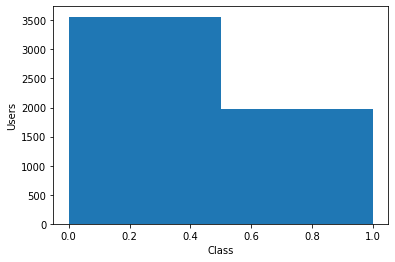

In [35]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

print(Counter(tr_y))
plt.hist(tr_y, bins=len(set(tr_y)))
plt.ylabel('Users');
plt.xlabel('Class');

# Un ojo a los datos

In [36]:
tr_txt[:10]

['lo peor de todo es que no me dan por un tiempo y luego vuelven estoy hasta la verga de estl\n',
 'a la vga no seas mamón 45 putos minutos después me dices que apenas sales no me querías avisar en 3 horas? 😑\n',
 'considero que lo más conveniente seria que lo retes a unos vergazos mi jelipe! rómpele la madre a ese pinchi joto!\n',
 'el marica de mi ex me tiene bloqueada de todo así  uno no puede admirar la "belleza" de su garnacha 😂\n',
 'mujer despechadaya pinche amlo hazle esta que se pela la loca #reynosafollow #reynosa\n',
 'putos. no tienen madre. ambriados mantenidos. ojetes. como es posible. mejor matarlos\n',
 'ustedes si puden andar de chanceros pero cuidadito y seamos nosotras porque luego luego empiezan a mamar hijos de la chingada.\n',
 '@usuario jajjaja te digo esa madre si está buena ajjaja\n',
 'odio los putos trámites de titulación 😡😡😡😡😡😡😡😡😡😡😡 pero me urge la precedula.\n',
 '@usuario no te equivocabas mi madre y tu tenían muchísima razón siempre es mejor lo que viene 

### Construcción simple del vocabulario

In [37]:
import nltk

In [38]:
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += doc.split()
#print(corpus_palabras)
fdist = nltk.FreqDist(corpus_palabras)

In [39]:
fdist

FreqDist({'de': 3342, 'que': 3336, 'a': 2605, 'la': 2417, 'y': 2225, 'no': 1743, 'me': 1582, 'el': 1285, '@usuario': 1243, 'en': 1184, ...})

In [40]:
len(fdist)

17055

In [41]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [93]:
V = sortFreqDict(fdist)
V = V[:5000]

In [96]:
dict_indices = dict()
index2word = dict()
cont = 0
for weight, word in V:
    dict_indices[word] = cont
    index2word[cont] = word
    cont += 1   

### Bolsa de Términos

In [44]:
import numpy as np
def build_bow_tr(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc += 1
        
    return BOW

### Debug?

In [45]:
tr_txt[10]

'"no me importa lo que digan esos putos periodistas la puta que los pario oh oh oh hay que alentar a la selección"\n'

In [46]:

fdist_doc = nltk.FreqDist(tr_txt[10].split())

In [47]:
fdist_doc

FreqDist({'que': 3, 'oh': 3, 'la': 2, '"no': 1, 'me': 1, 'importa': 1, 'lo': 1, 'digan': 1, 'esos': 1, 'putos': 1, ...})

### Bolsa de Terminos en Validación

In [48]:
BOW_tr=build_bow_tr(tr_txt, V, dict_indices)

In [49]:
print(V[:10])

[(3342, 'de'), (3336, 'que'), (2605, 'a'), (2417, 'la'), (2225, 'y'), (1743, 'no'), (1582, 'me'), (1285, 'el'), (1243, '@usuario'), (1184, 'en')]


In [50]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
#print(BOW[10])

In [51]:
val_txt, val_y = get_texts_from_file("./mex_val.txt", "./mex_val_labels.txt")

In [52]:
val_y = list(map(int, val_y))

Counter({0: 397, 1: 219})


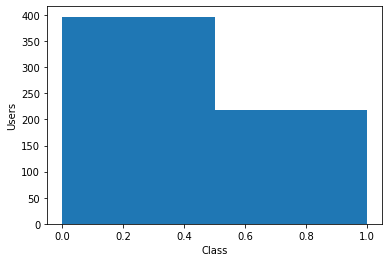

In [53]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

print(Counter(val_y))
plt.hist(val_y, bins=len(set(val_y)))
plt.ylabel('Users');
plt.xlabel('Class');

In [54]:
val_txt[:10]

['así debería ser siempre para que se mueran a la verga\n',
 'cada día me siento como un perro ovejero tratando de cuidar sus ovejas vale madre pinches rateros póngase a trabajar.😤\n',
 'hijo de tu puta madre nadamas te la pasas mamando pinche wilo de closet\n',
 'soñé horrible espero no se cumpla putos temblores.\n',
 '@usuario mejor vas y la chingas tú veo tus publicaciones y solo denotan inconformidad como típico ciudadano quejumbroso que no hace nada por cambiar\n',
 'y quizás este loca y quizás me guste estarlo... #siempreneruda\n',
 'me tienen hasta la verga con sus putos #boomerang pendejos y sin sentido.\n',
 'cuando va a ser el día que encuentre a alguien en quien pueda  confiar posts la re puta madre?\n',
 '#ahoritaestoypensando  como putas puede pasar esto?\n',
 '#todoibabienpero valio madre ya me atacó el insomnio🙅\n']

In [55]:
BOW_val=build_bow_tr(val_txt, V, dict_indices)

In [56]:
BOW_tr.shape

(5544, 5000)

# 1) Utilizando la matriz BOW_tr lleve acabo la descomposición de valores sigulares.

In [57]:
U, D, V = np.linalg.svd(BOW_tr, full_matrices=True)

## 1.2) Imprima los tamaños de las matrices obtenidas con SVD

In [58]:
print("U dims: ", U.shape)
print("D dims: ", D.shape)
print("V dims: ", V.shape)

U dims:  (5544, 5544)
D dims:  (5000,)
V dims:  (5000, 5000)


## 1.3) Imprima la matriz sigma en su versión cuadrada unicamente con el top 10 de valores en la diagonal.

In [59]:
D10 = np.zeros((10,10))
row,col = np.diag_indices(10)
D10[row,col] = D[:10]

In [60]:
print(D10)

[[121.46389317   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          59.92000745   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          56.09662232   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          50.25544863   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          47.70062991
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   46.87218396   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          42.00630312   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.          41.69911538   0

## 1.4) Los primeros 10x10 elementos de la matriz original de BOW_tr con los primeros 10x10 valores de su versión reconstruida a través de el top 10 de valores en sigma

In [61]:
BOW_tr10 = U[:,:10]@D10@V[:10,:]

In [62]:
print(BOW_tr10[:10,:10])

[[ 1.97021140e+00  1.12541808e+00 -9.43645336e-02  1.11795275e+00
   1.07693990e+00  9.92386479e-01  9.86544743e-01  1.43236767e-01
  -1.94162008e-02 -4.56513189e-02]
 [-9.37618241e-02  8.61648257e-01  8.69493748e-01  8.98811028e-01
  -1.67713223e-01  1.74022386e+00  1.86966367e+00  2.67702265e-02
  -3.35757424e-03  6.16159714e-01]
 [ 2.57575850e-02  2.08103410e+00  2.02490204e+00  9.33178327e-01
   6.13528269e-02 -5.40978781e-02  1.67134247e-01 -3.81181693e-02
   1.94898142e-01 -1.13872802e-01]
 [ 2.95887815e+00 -4.30659486e-02  3.20947808e-02  8.12284267e-01
  -4.02072580e-02  8.39671714e-01  9.98306716e-01  7.22384592e-01
   2.63151750e-02  2.97345162e-01]
 [ 1.04347724e-02  1.02591440e+00  9.97311237e-03  9.96768052e-01
   1.93428853e-02  5.53177879e-02  4.15207404e-03  1.20424652e-03
  -8.05442816e-03  2.00430569e-01]
 [ 8.00419554e-03  6.84199237e-02 -3.85944752e-02  4.69449446e-02
   3.14373343e-02  1.06979555e+00 -3.25980268e-02  1.66657917e-01
   7.47249088e-02 -5.98306273e-02

## 1.5) Proyecte todos los documentos en BOW_val al espacio latente obtenido con LSI

In [63]:
BOW_val10 = BOW_val.dot(V.T[:,:10])
BOW_val.shape

(616, 5000)

## 1.6) Evalué 1.5 en clasificación supervisada

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing
import numpy as np

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
    
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_tr10, tr_y) 

y_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[267 130]
 [ 98 121]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       397
           1       0.48      0.55      0.51       219

    accuracy                           0.63       616
   macro avg       0.61      0.61      0.61       616
weighted avg       0.64      0.63      0.63       616



/home/isaac/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 1.7) Vuelva a construir LSI pero ahora sobre una matriz tf-idf normalizada con l2, posteriormente evalué y compare en clasificación supervisada.

In [1]:
def build_bow_tr_tfidf(tr_txt, V, dict_indices):
    
    BOW = np.zeros((len(tr_txt),len(V)), dtype=np.float64)
    cont_doc = 0
    
    df = {}
    
    for word in dict_indices.keys():
        for tr in tr_txt:
            if word in tr:
                if not word in df:
                    df[word] = 1
                else:
                    df[word] += 1
    
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]*np.log10((len(tr_txt)/df[word]))
        cont_doc += 1
        
        
    for i in range(BOW.shape[0]):
        norm = np.linalg.norm(BOW[i])

        if norm == 0:
            norm = 1

        BOW[i] = BOW[i]/norm
        
    return BOW

In [ ]:
BOW_tr=build_bow_tr_tfidf(tr_txt, V, dict_indices)
BOW_val=build_bow_tr_tfidf(val_txt, V, dict_indices)

In [ ]:
U, D, V = np.linalg.svd(BOW_tr, full_matrices=True)

D10 = np.zeros((10,10))
row,col = np.diag_indices(10)
D10[row,col] = D[:10]

BOW_tr10 = U[:,:10]@D10@V[:10,:]

# 2)  Calcule Información mutua para los términos de la matriz BOW_tr e imprima el top 50 de cada clase (Visualice TAMBIEN CON https://amueller.github.io/word_cloud/)

In [201]:
def ppmi(BOW):
    
    total = np.sum(BOW)
    byrow = np.sum(BOW/total, axis = 0)
    bycol = np.sum(BOW/total, axis = 1)
    bycol[bycol==0] = np.min(bycol[bycol>0])
        
    pij = BOW/total
    
    pmi = pij*(1/bycol[:,np.newaxis])*(1/byrow)
    
    pmi[pmi>0] = np.log10(pmi[pmi>0])
    
    max_elems = []
    
    for i in range(50):
        ind = np.unravel_index(np.argmax(pmi, axis=None), pmi.shape)
        max_elems.append(ind)
        pmi[ind] = np.NINF
        
            
    return pmi, max_elems

In [202]:
ppmi_list, max_elems = ppmi(BOW_tr)
max_ppmi_words = [index2word[elem[1]] for elem in max_elems]

In [ ]:
###############################

In [203]:
from collections import defaultdict
import numpy as np

n_ip = defaultdict(int)

for word in dict_indices.keys():
    for tweet, category in zip(tr_txt, tr_y):
        if word in tweet:
            n_ip[(word, category)] += 1

In [211]:
mi = []
n_p = [tr_y.count(0), tr_y.count(1)]
nt = len(tr_y)
for word, index in zip(dict_indices.keys(), dict_indices.values()):
    mi_w = 0
    ni = n_ip[(word, 0)]+n_ip[(word, 1)]
    for category in [0, 1]:
        term_logval = n_ip[(word,category)]/(ni*n_p[category])
        if term_logval == 0:
            term = 0
        else:
            term = (n_p[category]/nt)*np.log(term1_logval)

        mi_w += term

    mi.append((mi_w, index))

In [212]:
mi.sort(reverse = True)
mi_top50 = [index2word[i] for mi_val, i in mi[:50]]

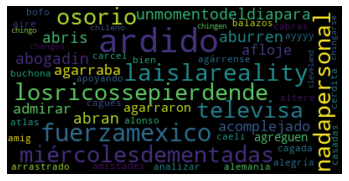

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(mi_top50)

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 3)  Calcule ganancia de información para los términos de la matriz BOW_tr e imprima el top 50 de la colección y su ganancia. (Visualice TAMBIEN CON https://amueller.github.io/word_cloud/)

In [198]:
from collections import defaultdict
import numpy as np

n_ip = defaultdict(int)

for word in dict_indices.keys():
    for tweet, category in zip(tr_txt, tr_y):
        if word in tweet:
            n_ip[(word, category)] += 1

In [174]:
ig = []
n_p = [tr_y.count(0), tr_y.count(1)]
nt = len(tr_y)
for word, index in zip(dict_indices.keys(), dict_indices.values()):
    ig_w = 0
    ni = n_ip[(word, 0)]+n_ip[(word, 1)]
    for category in [0, 1]:
        term1_logval = n_p[category]/nt
        if term1_logval == 0:
            term1 = 0
        else:
            term1 = (n_p[category]/nt)*np.log(term1_logval)
            
        term2_logval = n_ip[(word, category)]/ni
        if term2_logval == 0:
            term2 = 0
        else:
            term2 = (n_ip[(word, category)]/nt)*np.log(term2_logval)
            
        term3_logval = (n_p[category]-n_ip[(word, category)])/(nt-ni)
        if term3_logval == 0:
            term3 = 0
        else:
            term3 = ((n_p[category]-n_ip[(word, category)])/nt)*np.log(term3_logval)

        ig_w += term1 - term2 - term3

    ig.append((-ig_w, index))

In [177]:
ig.sort(reverse = True)
ig_top50 = [index2word[i] for ig_val, i in ig[:50]]

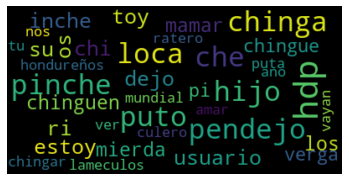

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(ig_top50)

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 4)  Calcule ganancia de información con Chi2 para los términos de la matriz BOW_tr e imprima el top 50 de la colección y su ganancia. (Visualice TAMBIEN CON https://amueller.github.io/word_cloud/)

In [ ]:
from collections import defaultdict
import numpy as np

n_ip = defaultdict(int)

for word in dict_indices.keys():
    for tweet, category in zip(tr_txt, tr_y):
        if word in tweet:
            n_ip[(word, category)] += 1

In [183]:
chi = []
n_p = [tr_y.count(0), tr_y.count(1)]
nt = len(tr_y)
for word, index in zip(dict_indices.keys(), dict_indices.values()):
    chi_w = 0
    ni = n_ip[(word, 0)]+n_ip[(word, 1)]
    for category in [0, 1]:
        term1 = nt*n_ip[(word, category)]
        term2 = n_p[category]*ni
        den = n_p[category]*ni*(nt-n_p[category])*(nt-ni)

        chi_wc = (nt*(term1-term2)**2)/den

        chi.append((category, (chi_wc, index)))

In [185]:
chi_aggresive = [chi_wc for cat, chi_wc in chi if cat == 0]
chi_not_aggresive = [chi_wc for cat, chi_wc in chi if cat == 1]

In [186]:
chi_aggresive.sort(reverse = True)
chi_aggresive_top50 = [index2word[i] for chi_val, i in chi_aggresive[:50]]

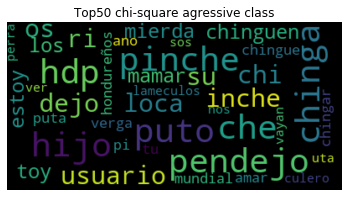

In [193]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(chi_aggresive_top50)

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top50 chi-square agressive class")
plt.show()

In [189]:
chi_not_aggresive.sort(reverse = True)
chi_not_aggresive_top50 = [index2word[i] for chi_val, i in chi_not_aggresive[:50]]

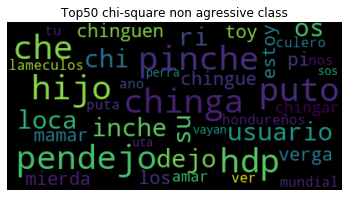

In [192]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(chi_not_aggresive_top50)

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top50 chi-square non agressive class")
plt.show()